In [1]:
import numpy
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Step 2: Load dataset
df = pd.read_csv('D:\\dataset\\Battery_Data_Cleaned.csv')

# Step 3: Preview the data
print(df.head())


   type  ambient_temperature  battery_id  test_id  uid   filename  Capacity  \
0    -1                    4          47        0    1  00001.csv  0.983689   
1     0                   24          47        1    2  00002.csv  0.983689   
2     1                    4          47        2    3  00003.csv  0.983689   
3     0                   24          47        3    4  00004.csv  0.983689   
4    -1                    4          47        4    5  00005.csv  0.925990   

         Re       Rct  
0  0.054543  0.183130  
1  0.054543  0.183130  
2  0.054543  0.183130  
3  0.051825  0.152493  
4  0.051825  0.152493  


In [3]:
df.isna().sum()

type                   0
ambient_temperature    0
battery_id             0
test_id                0
uid                    0
filename               0
Capacity               0
Re                     0
Rct                    0
dtype: int64

In [4]:
df.shape

(7368, 9)

In [5]:
df.describe()

,type,ambient_temperature,battery_id,test_id,uid,Capacity,Re,Rct
count,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000
mean,0.002443,19.911238,32.213762,166.309718,3735.133415,0.824926,0.077739,0.125128
std,0.865297,11.210718,16.643714,139.771878,2190.232696,0.250283,0.022584,0.044834
min,-1.000000,4.000000,5.000000,0.000000,1.000000,0.000000,0.026691,0.038781
25%,-1.000000,4.000000,18.000000,54.000000,1842.750000,0.775098,0.060875,0.084685
50%,0.000000,24.000000,36.000000,125.000000,3686.500000,0.894803,0.074693,0.118383
75%,1.000000,24.000000,45.000000,244.250000,5603.250000,0.986519,0.095817,0.158926
max,1.000000,44.000000,56.000000,555.000000,7565.000000,1.292025,0.142128,0.238124


In [7]:
# Calculate degradation feature
df['degradation_feature'] = df['Re'] * df['Rct']

# Define the maximum expected RUL
max_expected_rul = 1000

# Calculate RUL
df['RUL'] = max_expected_rul / (df['degradation_feature'] + 1)

In [8]:
df

,type,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,degradation_feature,RUL
0,-1,4,47,0,1,00001.csv,0.983689,0.054543,0.183130,0.009988,990.110348
1,0,24,47,1,2,00002.csv,0.983689,0.054543,0.183130,0.009988,990.110348
2,1,4,47,2,3,00003.csv,0.983689,0.054543,0.183130,0.009988,990.110348
3,0,24,47,3,4,00004.csv,0.983689,0.051825,0.152493,0.007903,992.158968
4,-1,4,47,4,5,00005.csv,0.925990,0.051825,0.152493,0.007903,992.158968
...,...,...,...,...,...,...,...,...,...,...,...
7363,0,24,55,247,7561,07561.csv,0.699483,0.092405,0.144011,0.013307,986.867397
7364,-1,4,55,248,7562,07562.csv,0.703166,0.092405,0.144011,0.013307,986.867397
7365,1,4,55,249,7563,07563.csv,0.703166,0.092405,0.144011,0.013307,986.867397
7366,-1,4,55,250,7564,07564.csv,0.688516,0.092405,0.144011,0.013307,986.867397


In [9]:
df.describe()

,type,ambient_temperature,battery_id,test_id,uid,Capacity,Re,Rct,degradation_feature,RUL
count,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000
mean,0.002443,19.911238,32.213762,166.309718,3735.133415,0.824926,0.077739,0.125128,0.010173,989.953381
std,0.865297,11.210718,16.643714,139.771878,2190.232696,0.250283,0.022584,0.044834,0.004948,4.848309
min,-1.000000,4.000000,5.000000,0.000000,1.000000,0.000000,0.026691,0.038781,0.001068,970.962401
25%,-1.000000,4.000000,18.000000,54.000000,1842.750000,0.775098,0.060875,0.084685,0.005309,985.507089
50%,0.000000,24.000000,36.000000,125.000000,3686.500000,0.894803,0.074693,0.118383,0.010847,989.269855
75%,1.000000,24.000000,45.000000,244.250000,5603.250000,0.986519,0.095817,0.158926,0.014706,994.719470
max,1.000000,44.000000,56.000000,555.000000,7565.000000,1.292025,0.142128,0.238124,0.029906,998.933164


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

In [11]:
# Drop columns from input features
X = df.drop(['RUL', 'degradation_feature', 'filename'], axis=1)
y = df['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01, gamma=0, subsample=0.7, colsample_bytree=1, max_depth=3)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, ...)

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.030738849144577023
MAE: 0.11803312086395588
R2: 0.9986554107743837


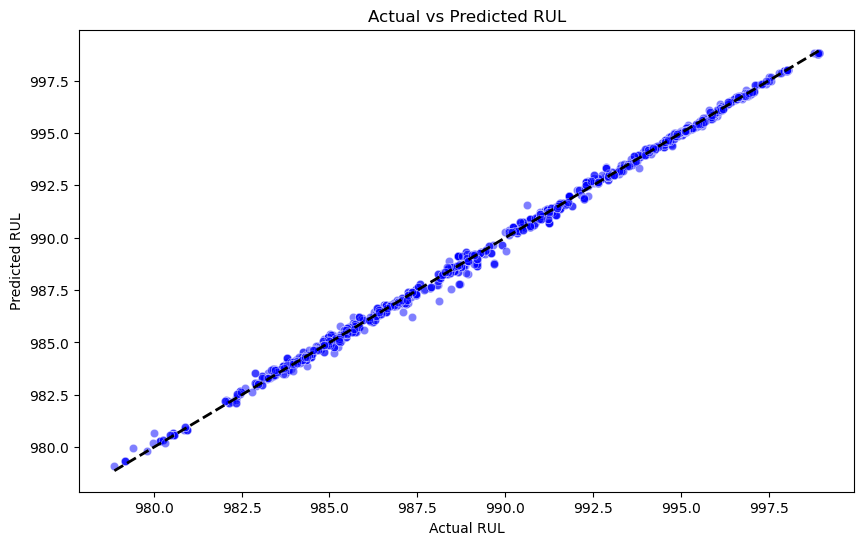

In [15]:
# Plotting Actual vs Predicted RUL
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize models
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
svr_model = SVR()

# Train models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
svr_pred = svr_model.predict(X_test)

# Evaluate models
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

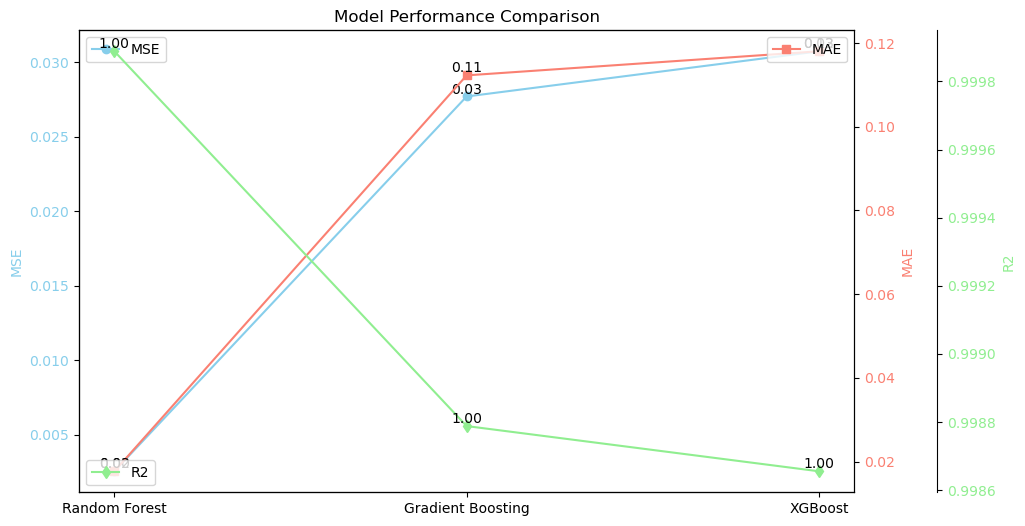

The best model in terms of MSE is Random Forest.
The other models suitable for deployment are: Gradient Boosting, XGBoost.


In [17]:
import matplotlib.pyplot as plt

# Plotting accuracy for different models
models = ['Random Forest', 'Gradient Boosting', 'XGBoost']
mse_scores = [rf_mse, gb_mse, mse]
mae_scores = [rf_mae, gb_mae, mae]
r2_scores = [rf_r2, gb_r2, r2]

x = range(len(models))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MSE
ax1.plot(x, mse_scores, marker='o', label='MSE', color='skyblue')
ax1.set_ylabel('MSE', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
# Plot MAE
ax2 = ax1.twinx()
ax2.plot(x, mae_scores, marker='s', label='MAE', color='salmon')
ax2.set_ylabel('MAE', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# Plot R2
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(x, r2_scores, marker='d', label='R2', color='lightgreen')
ax3.set_ylabel('R2', color='lightgreen')
ax3.tick_params(axis='y', labelcolor='lightgreen')

# Add data labels
def add_labels(ax, scores):
    for i, score in enumerate(scores):
        ax.text(i, score, f'{score:.2f}', ha='center', va='bottom')

add_labels(ax1, mse_scores)
add_labels(ax2, mae_scores)
add_labels(ax3, r2_scores)
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_title('Model Performance Comparison')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower left')

plt.show()

# Find the best model
best_model = models[mse_scores.index(min(mse_scores))]
print(f"The best model in terms of MSE is {best_model}.")

# Other models are suitable for deployment
other_models = [model for model in models if model != best_model]
print(f"The other models suitable for deployment are: {', '.join(other_models)}.")


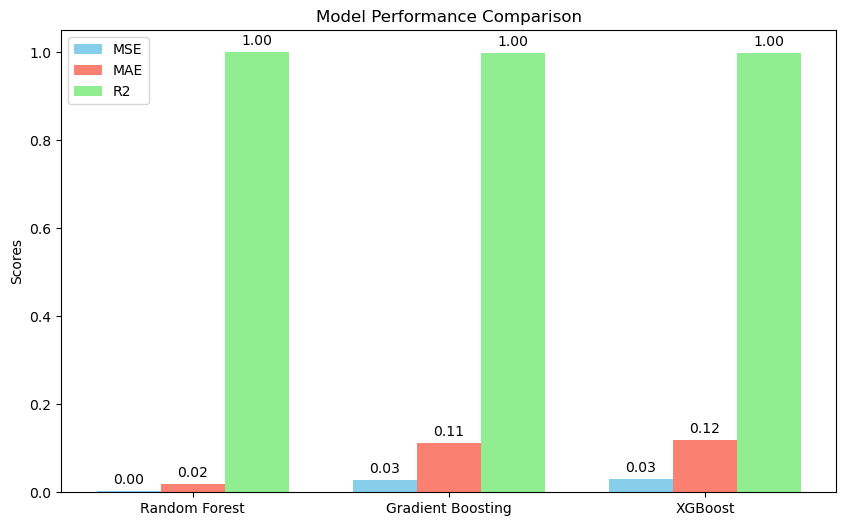

Best Model based on MSE: Random Forest
Best Model based on MAE: Random Forest
Best Model based on R2: Random Forest


In [18]:
# Plotting accuracy for different models
models = ['Random Forest', 'Gradient Boosting', 'XGBoost']
mse_scores = [rf_mse, gb_mse, mse]
mae_scores = [rf_mae, gb_mae, mae]
r2_scores = [rf_r2, gb_r2, r2]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Plot MSE
ax.bar(x - width, mse_scores, width, label='MSE', color='skyblue')
# Plot MAE
ax.bar(x, mae_scores, width, label='MAE', color='salmon')
# Plot R2
ax.bar(x + width, r2_scores, width, label='R2', color='lightgreen')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add data labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                   ha='center', va='bottom')

add_labels(ax.patches)

plt.show()

# Print the best model based on each metric
best_mse_model = models[np.argmin(mse_scores)]
best_mae_model = models[np.argmin(mae_scores)]
best_r2_model = models[np.argmax(r2_scores)]

print("Best Model based on MSE:", best_mse_model)
print("Best Model based on MAE:", best_mae_model)
print("Best Model based on R2:", best_r2_model)

In [19]:
print("Random Forest Evaluation:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R2:", rf_r2)

Random Forest Evaluation:
MSE: 0.0025446997560002508
MAE: 0.0176810040663032
R2: 0.9998886888751672


In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
